In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import requests
import csv
import play_scraper as gp
from pprint import pprint

In [2]:
# a complete list of categories for the google play store
categories = ["GAME_ACTION", "GAME_ADVENTURE",
              "GAME_ARCADE", "GAME_BOARD", 
              "GAME_CARD", "GAME_CASINO",
              "GAME_CASUAL", "GAME_EDUCATIONAL",
              "GAME_MUSIC",  "GAME_PUZZLE",
              "GAME_RACING", "GAME_ROLE_PLAYING",
              "GAME_SIMULATION", "GAME_SPORTS",
              "GAME_STRATEGY", "GAME_TRIVIA",
              "GAME_WORD"]

# Empty lists to put the game id (and game category for later).
game_category = []
game_list = []

# Grabs a list of the top 25 paid games in each category.
for x in categories:
    paid_games = gp.collection(collection='TOP_PAID', category=x, results=25)
    print(f' --')
    print(f'   *** Getting information for games in the {x} category. ***')
    print(f' --')
    for j in range (0, 25):
        game_info = paid_games[j]['app_id']
        title = paid_games[j]['title']
        game_category.append(x)
        game_list.append(game_info)
        print(f'{j}. Getting the Game ID for {title}.')
print(f' --')
print(f'All done! The loop collected a total of {len(game_list)} game titles.')
print(f' --')

 --
   *** Getting information for games in the GAME_ACTION category. ***
 --
0. Getting the Game ID for Grand Theft Auto: San Andreas.
1. Getting the Game ID for Five Nights at Freddy's.
2. Getting the Game ID for Five Nights at Freddy's: SL.
3. Getting the Game ID for Hitman Sniper.
4. Getting the Game ID for Assassin's Creed Identity.
5. Getting the Game ID for Five Nights at Freddy's 4.
6. Getting the Game ID for Call of Duty:Black Ops Zombies.
7. Getting the Game ID for Grand Theft Auto III.
8. Getting the Game ID for Teen Titans GO Figure!.
9. Getting the Game ID for Downwell.
10. Getting the Game ID for Bully: Anniversary Edition.
11. Getting the Game ID for Five Nights at Freddy's 3.
12. Getting the Game ID for Real Steel.
13. Getting the Game ID for LEGO ® Marvel Super Heroes.
14. Getting the Game ID for Bloons Supermonkey 2.
15. Getting the Game ID for GTA: Chinatown Wars.
16. Getting the Game ID for Stickman Ghost 2: Gun Sword - Shadow Action RPG.
17. Getting the Game ID for

 --
   *** Getting information for games in the GAME_EDUCATIONAL category. ***
 --
0. Getting the Game ID for Teach Your Monster to Read - Phonics and Reading.
1. Getting the Game ID for Toca Blocks.
2. Getting the Game ID for Explore Daniel's Neighborhood.
3. Getting the Game ID for Toca Boo.
4. Getting the Game ID for My Town : Hospital.
5. Getting the Game ID for Peppa Pig: Holiday.
6. Getting the Game ID for My City : Office.
7. Getting the Game ID for Toca Lab: Plants.
8. Getting the Game ID for My Town : Airport.
9. Getting the Game ID for Toca Mystery House.
10. Getting the Game ID for PAW Patrol Air and Sea Adventures.
11. Getting the Game ID for Daniel Tiger's Stop & Go Potty.
12. Getting the Game ID for My Town : Best Friends' House.
13. Getting the Game ID for My City : Dentist visit.
14. Getting the Game ID for My City : Home.
15. Getting the Game ID for Wild Kratts Rescue Run.
16. Getting the Game ID for My Town : ICEME Amusement Park.
17. Getting the Game ID for Learn to 

 --
   *** Getting information for games in the GAME_STRATEGY category. ***
 --
0. Getting the Game ID for Bloons TD 6.
1. Getting the Game ID for Kingdom Rush Vengeance.
2. Getting the Game ID for Bloons TD 5.
3. Getting the Game ID for The Escapists: Prison Escape.
4. Getting the Game ID for Papa's Freezeria To Go!.
5. Getting the Game ID for Rusted Warfare - RTS Strategy.
6. Getting the Game ID for Five Nights at Freddy's 2.
7. Getting the Game ID for ROME: Total War.
8. Getting the Game ID for Age of Civilizations II.
9. Getting the Game ID for Civilization Revolution 2.
10. Getting the Game ID for First Strike: Final Hour.
11. Getting the Game ID for Kingdom Rush Frontiers.
12. Getting the Game ID for Dungeon Maker.
13. Getting the Game ID for Papa's Scooperia To Go!.
14. Getting the Game ID for Papa's Pancakeria To Go!.
15. Getting the Game ID for Papa's Pizzeria To Go!.
16. Getting the Game ID for XCOM®: Enemy Within.
17. Getting the Game ID for Papa's Burgeria To Go!.
18. Getti

In [3]:
# confirms the total that we scraped above...
print(len(game_list))

425


In [4]:
# Empty lists to store the information we want
game_titles = []
game_scores = []
game_reviews = []
game_prices = []
game_installs = []
game_developers = []
game_urls = []

# Loops through the game id's that we gathered in the loop above and puts it into the lists we created 
i = 0
for game in game_list:
    game_details = gp.details(game_list[i])
    title_info = game_details['title']
    game_titles.append(title_info)
    game_scores.append(game_details['score'])
    game_reviews.append(game_details['reviews'])
    game_prices.append(game_details['price'])
    game_installs.append(game_details['installs'])
    game_developers.append(game_details['developer'])
    game_urls.append(game_details['url'])
    print(f'Getting information for {title_info}.')
    i += 1
print(f'All done! The loop processed a total of {len(game_titles)} results.')

Getting information for Grand Theft Auto: San Andreas.
Getting information for Five Nights at Freddy's.
Getting information for Five Nights at Freddy's: SL.
Getting information for Hitman Sniper.
Getting information for Assassin's Creed Identity.
Getting information for Five Nights at Freddy's 4.
Getting information for Call of Duty:Black Ops Zombies.
Getting information for Grand Theft Auto III.
Getting information for Teen Titans GO Figure!.
Getting information for Downwell.
Getting information for Bully: Anniversary Edition.
Getting information for Five Nights at Freddy's 3.
Getting information for Real Steel.
Getting information for LEGO ® Marvel Super Heroes.
Getting information for Bloons Supermonkey 2.
Getting information for GTA: Chinatown Wars.
Getting information for Stickman Ghost 2: Gun Sword - Shadow Action RPG.
Getting information for Zombieville USA 2.
Getting information for LEGO® Star Wars™:  TCS.
Getting information for Goat Simulator GoatZ.
Getting information for Sh

Getting information for Peppa Pig: Holiday.
Getting information for My City : Office.
Getting information for Toca Lab: Plants.
Getting information for My Town : Airport.
Getting information for Toca Mystery House.
Getting information for PAW Patrol Air and Sea Adventures.
Getting information for Daniel Tiger's Stop & Go Potty.
Getting information for My Town : Best Friends' House.
Getting information for My City : Dentist visit.
Getting information for My City : Home.
Getting information for Wild Kratts Rescue Run.
Getting information for My Town : ICEME Amusement Park.
Getting information for Learn to Read with Tommy Turtle.
Getting information for My Town : Grandparents.
Getting information for BRIO World - Railway.
Getting information for Second Grade Learning Games.
Getting information for My Town : School.
Getting information for Dr. Panda Restaurant 2.
Getting information for My Town : Hotel.
Getting information for Stack the States® 2.
Getting information for Cytus II.
Getting 

Getting information for Kingdom Rush Frontiers.
Getting information for Dungeon Maker.
Getting information for Papa's Scooperia To Go!.
Getting information for Papa's Pancakeria To Go!.
Getting information for Papa's Pizzeria To Go!.
Getting information for XCOM®: Enemy Within.
Getting information for Papa's Burgeria To Go!.
Getting information for Kingdom Rush Origins.
Getting information for Slay.
Getting information for Uciana.
Getting information for Organ Trail: Director's Cut.
Getting information for Teeny Titans - Teen Titans Go!.
Getting information for Door Kickers.
Getting information for Warhammer 40,000: Regicide.
Getting information for Trivia Crack (No Ads).
Getting information for BLeBRiTY.
Getting information for Sporcle.
Getting information for The Jackbox Party Pack.
Getting information for The Jackbox Party Pack 3.
Getting information for Bible Bowl Prep 2019.
Getting information for The Jackbox Party Pack 5.
Getting information for The Jackbox Party Pack 4.
Getting 

In [71]:
# Combines the lists above into a nice, tidy data frame
games_master = {
    "Game Title": game_titles,
    "Game Category": game_category,
    "Game Score": game_scores,
    "Number of Reviews": game_reviews,
    "Price": game_prices,
    "Number of Installs": game_installs,
    "Developer": game_developers,
    "Play Store URL": game_urls
    
}
games_df = pd.DataFrame(games_master)
games_df.head()

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,386728,$6.99,"1,000,000+",Rockstar Games,https://play.google.com/store/apps/details?id=...
1,Five Nights at Freddy's,GAME_ACTION,4.6,103745,$2.99,"1,000,000+",Scott Cawthon,https://play.google.com/store/apps/details?id=...
2,Five Nights at Freddy's: SL,GAME_ACTION,4.5,17302,$2.99,"100,000+",Scott Cawthon,https://play.google.com/store/apps/details?id=...
3,Hitman Sniper,GAME_ACTION,4.6,590033,$0.99,"10,000,000+",SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...
4,Assassin's Creed Identity,GAME_ACTION,3.8,49874,$1.99,"500,000+",Ubisoft Entertainment,https://play.google.com/store/apps/details?id=...


In [72]:
# check the data types
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 8 columns):
Game Title            425 non-null object
Game Category         425 non-null object
Game Score            418 non-null object
Number of Reviews     425 non-null int64
Price                 425 non-null object
Number of Installs    425 non-null object
Developer             425 non-null object
Play Store URL        425 non-null object
dtypes: int64(1), object(7)
memory usage: 26.6+ KB


In [73]:
# Cleans up and formats the data
games_df['Number of Installs'] = games_df['Number of Installs'].str.replace('+', '')
games_df['Number of Installs'] = games_df['Number of Installs'].str.replace(',', '')
games_df['Number of Installs'] = pd.to_numeric(games_df['Number of Installs'], errors='coerce')
games_df['Game Score'] = pd.to_numeric(games_df['Game Score'], errors='coerce')
games_df['Price'] = games_df['Price'].str.replace('$', '')
games_df['Price'] = pd.to_numeric(games_df['Price'], errors='coerce')
games_df.head()

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,386728,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...
1,Five Nights at Freddy's,GAME_ACTION,4.6,103745,2.99,1000000,Scott Cawthon,https://play.google.com/store/apps/details?id=...
2,Five Nights at Freddy's: SL,GAME_ACTION,4.5,17302,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...
3,Hitman Sniper,GAME_ACTION,4.6,590033,0.99,10000000,SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...
4,Assassin's Creed Identity,GAME_ACTION,3.8,49874,1.99,500000,Ubisoft Entertainment,https://play.google.com/store/apps/details?id=...


In [74]:
# Find the total revenue of each game and put it into a new column
games_df['Total Download Revenue ($)'] = (games_df['Price'] * games_df['Number of Installs']).apply(lambda x: '{:.2f}'.format(x)).astype(float)
games_df.head()

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL,Total Download Revenue ($)
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,386728,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.0
1,Five Nights at Freddy's,GAME_ACTION,4.6,103745,2.99,1000000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,2990000.0
2,Five Nights at Freddy's: SL,GAME_ACTION,4.5,17302,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,299000.0
3,Hitman Sniper,GAME_ACTION,4.6,590033,0.99,10000000,SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...,9900000.0
4,Assassin's Creed Identity,GAME_ACTION,3.8,49874,1.99,500000,Ubisoft Entertainment,https://play.google.com/store/apps/details?id=...,995000.0


In [162]:
# Creates a new dataframe for our Minecraft analysis
minecraft_df = games_df.copy()

In [163]:
# Make 'Minecraft' its own category
minecraft_df.at[[50], 'Game Category'] = 'MINECRAFT'

In [146]:
minecraft_df.head(60)

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL,Total Download Revenue ($)
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,386728,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.0
1,Five Nights at Freddy's,GAME_ACTION,4.6,103745,2.99,1000000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,2990000.0
2,Five Nights at Freddy's: SL,GAME_ACTION,4.5,17302,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,299000.0
3,Hitman Sniper,GAME_ACTION,4.6,590033,0.99,10000000,SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...,9900000.0
4,Assassin's Creed Identity,GAME_ACTION,3.8,49874,1.99,500000,Ubisoft Entertainment,https://play.google.com/store/apps/details?id=...,995000.0
5,Five Nights at Freddy's 4,GAME_ACTION,4.6,21560,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,299000.0
6,Call of Duty:Black Ops Zombies,GAME_ACTION,4.2,13974,6.99,100000,"Activision Publishing, Inc.",https://play.google.com/store/apps/details?id=...,699000.0
7,Grand Theft Auto III,GAME_ACTION,4.0,96594,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.0
8,Teen Titans GO Figure!,GAME_ACTION,4.5,4537,3.99,50000,Cartoon Network,https://play.google.com/store/apps/details?id=...,199500.0
9,Downwell,GAME_ACTION,4.7,4544,2.99,100000,DevolverDigital,https://play.google.com/store/apps/details?id=...,299000.0


In [78]:
# Number of total installations for each category
game_inst_sums = games_df.groupby(['Game Category']).agg({'Number of Installs': 'sum'}).sort_values('Number of Installs', ascending=False)
game_inst_sums

,Number of Installs
Game Category,
GAME_ARCADE,17792000
GAME_ACTION,16955000
GAME_PUZZLE,8981000
GAME_SIMULATION,4500000
GAME_ADVENTURE,4350000
GAME_STRATEGY,4345000
GAME_RACING,4337100
GAME_SPORTS,2948500
GAME_CARD,2339000


In [267]:
# installations and revenue grouped by price
price_sums = minecraft_df.groupby(['Price']).agg({'Number of Installs': 'sum'}).sort_values('Number of Installs', ascending=False)
price_sums = price_sums.reset_index()
price_sums['Total Revenue'] = price_sums['Price'] * price_sums['Number of Installs']
price_sums['Total Revenue'] = price_sums['Total Revenue'] / 1e6
price_sums = price_sums.sort_values('Price', ascending=True)
price_sums

,Price,Number of Installs,Total Revenue
0,0.99,24007635,23.767559
20,1.00,100000,0.100000
15,1.29,105000,0.135450
19,1.39,100000,0.139000
7,1.49,1121255,1.670670
4,1.99,7049905,14.029311
28,2.00,100,0.000200
8,2.49,1011120,2.517689
25,2.90,1000,0.002900
3,2.99,10004300,29.912857


In [303]:
price_sums_no_mc = no_mc.groupby(['Price']).agg({'Number of Installs': 'sum'}).sort_values('Number of Installs', ascending=False)
price_sums_no_mc = price_sums_no_mc.reset_index()
price_sums_no_mc['Total Revenue'] = price_sums_no_mc['Price'] * price_sums_no_mc['Number of Installs']
price_sums_no_mc['Total Revenue'] = price_sums_no_mc['Total Revenue'] / 1e6
price_sums_no_mc = price_sums_no_mc.sort_values('Price', ascending=True)
price_sums_no_mc

,Price,Number of Installs,Total Revenue
0,0.99,24007635,23.767559
20,1.00,100000,0.100000
15,1.29,105000,0.135450
19,1.39,100000,0.139000
7,1.49,1121255,1.670670
3,1.99,7049905,14.029311
28,2.00,100,0.000200
8,2.49,1011120,2.517689
25,2.90,1000,0.002900
2,2.99,10004300,29.912857


In [76]:
# Revenue by category
group_sums = games_df.groupby(['Game Category'])['Total Download Revenue ($)'].agg('sum').to_frame().sort_values('Total Download Revenue ($)', ascending=False)
group_sums

,Total Download Revenue ($)
Game Category,
GAME_ARCADE,92442080.00
GAME_ACTION,33920450.00
GAME_PUZZLE,19854190.00
GAME_ADVENTURE,18256500.00
GAME_SIMULATION,17410000.00
GAME_STRATEGY,14577550.00
GAME_TRIVIA,12419039.20
GAME_RACING,10893979.00
GAME_ROLE_PLAYING,8897590.00


In [157]:
# Totals grouped by price and category, with average game score grouped by category & price.
price_sums = games_df.groupby(['Game Category','Price']).sum()
price_sums.columns = ['Avg. Game Score', 'Total Reviews', 'Total Installs', 'Total Download Revenue ($)']
price_sums['Avg. Game Score'] = games_df.groupby(['Game Category','Price']).mean()
price_sums = / 1e6

Avg. Game Score  Total Reviews  Total Installs  \
Game Category  Price                                                   
GAME_ACTION    0.99          4.500000         693496        12150000   
               1.99          3.800000          49874          500000   
               2.49          4.100000           1673           50000   
               2.99          4.542857         204059         1505000   
               3.99          4.500000           4537           50000   
               4.99          4.160000         156739         1400000   
               6.99          4.175000         430906         1300000   
GAME_ADVENTURE 0.99          4.200000          18633         1000000   
               1.49          4.350000           6016           60000   
               1.99          4.600000          14414          200000   
               2.99          4.580000          14619          175000   
               3.99          4.200000          11099          200000   
               4.99          4.277778         330108         2460000   
               6.99          4.466667          24379          155000   
               20.99         4.400000           7395          100000   
GAME_ARCADE    0.99          4.242857         180746         2610000   
               1.49          4.700000           5438           50000   
               1.99          4.666667         652974         1011000   
               2.49          4.500000          13833          100000   
               2.99          4.025000          53536          301000   
               3.75          4.500000          35008          500000   
               3.99          4.400000          49675         1220000   
               4.99          4.250000         199832         2000000   
GAME_BOARD     1.99          4.375000          31676          260000   
               2.99          4.150000          25472          565000   
               3.49          4.000000           9666          130000   
               3.99          4.550000          10968          110000   
               4.99          4.357143          63003          950000   
               6.99          4.200000           2179           30000   
               9.99          4.900000           5942           10000   
...                               ...            ...             ...   
GAME_SPORTS    8.99          4.000000           7302          100000   
GAME_STRATEGY  0.99          4.360000          35347          400000   
               1.00          4.300000           8734          100000   
               1.99          4.625000         117697          565000   
               2.99          4.600000         394675         2200000   
               3.99          4.600000          31337          210000   
               4.99          4.633333          71858          560000   
               6.49          4.300000           9065          100000   
               9.99          4.200000          27759          210000   
GAME_TRIVIA    0.99          3.825000            513           10660   
               1.49          4.500000            112            1000   
               1.99          3.666667           2587           60100   
               2.49          3.566667           4383           50020   
               2.99          4.140000           3068           20700   
               5.99          4.500000          61154          500000   
               8.99          4.200000          90894         1000000   
               9.99          4.900000             22             100   
               24.99         3.975000             55            4000   
               29.99         3.500000              2             500   
GAME_WORD      0.99          4.350000            663           22600   
               1.49          3.700000              3              50   
               1.99          4.540000            998           13500   
               2.49          3.300000            102          

In [242]:
minecraft_scores = minecraft_df[['Game Category','Game Score']].groupby(['Game Category']).mean().sort_values('Game Score', ascending=False)
minecraft_scores_avg = minecraft_scores['Game Score'].mean()
print(f'The overall average game score of the top 25 games in each category is {minecraft_scores_avg}')

The overall average game score of the top 25 games in each category is 4.337453703703704


In [241]:
minecraft_scores

,Game Score
Game Category,
GAME_PUZZLE,4.632000
GAME_MUSIC,4.545000
GAME_CARD,4.520000
MINECRAFT,4.500000
GAME_STRATEGY,4.488000
GAME_SIMULATION,4.424000
GAME_ROLE_PLAYING,4.416000
GAME_ADVENTURE,4.388000
GAME_ACTION,4.348000


In [152]:
# Totals grouped by price and category, with average game score grouped by category & price - FOR MINECRAFT AS ITS OWN CATEGORY
minecraft_sums = minecraft_df.groupby(['Game Category','Price']).sum()
minecraft_sums.columns = ['Avg. Game Score', 'Total Reviews', 'Total Installs', 'Total Download Revenue ($)']
minecraft_sums['Avg. Game Score'] = minecraft_df.groupby(['Game Category','Price']).mean()


Avg. Game Score  Total Reviews  Total Installs  \
Game Category Price                                                   
GAME_ACTION   0.99          4.500000         693496        12150000   
              1.99          3.800000          49874          500000   
              2.49          4.100000           1673           50000   
              2.99          4.542857         204059         1505000   
              3.99          4.500000           4537           50000   

                     Total Download Revenue ($)  
Game Category Price                              
GAME_ACTION   0.99                   12028500.0  
              1.99                     995000.0  
              2.49                     124500.0  
              2.99                    4499950.0  
              3.99                     199500.0

In [243]:
minecraft_sums

Avg. Game Score  Total Reviews  Total Installs  \
Game Category  Price                                                   
GAME_ACTION    0.99          4.500000         693496        12150000   
               1.99          3.800000          49874          500000   
               2.49          4.100000           1673           50000   
               2.99          4.542857         204059         1505000   
               3.99          4.500000           4537           50000   
               4.99          4.160000         156739         1400000   
               6.99          4.175000         430906         1300000   
GAME_ADVENTURE 0.99          4.200000          18633         1000000   
               1.49          4.350000           6016           60000   
               1.99          4.600000          14414          200000   
               2.99          4.580000          14619          175000   
               3.99          4.200000          11099          200000   
               4.99          4.277778         330108         2460000   
               6.99          4.466667          24379          155000   
               20.99         4.400000           7395          100000   
GAME_ARCADE    0.99          4.242857         180746         2610000   
               1.49          4.700000           5438           50000   
               1.99          4.666667         652974         1011000   
               2.49          4.500000          13833          100000   
               2.99          4.025000          53536          301000   
               3.75          4.500000          35008          500000   
               3.99          4.400000          49675         1220000   
               4.99          4.250000         199832         2000000   
GAME_BOARD     1.99          4.375000          31676          260000   
               2.99          4.150000          25472          565000   
               3.49          4.000000           9666          130000   
               3.99          4.550000          10968          110000   
               4.99          4.357143          63003          950000   
               6.99          4.200000           2179           30000   
               9.99          4.900000           5942           10000   
...                               ...            ...             ...   
GAME_SPORTS    8.99          4.000000           7302          100000   
GAME_STRATEGY  0.99          4.360000          35347          400000   
               1.00          4.300000           8734          100000   
               1.99          4.625000         117697          565000   
               2.99          4.600000         394675         2200000   
               3.99          4.600000          31337          210000   
               4.99          4.633333          71858          560000   
               6.49          4.300000           9065          100000   
               9.99          4.200000          27759          210000   
GAME_TRIVIA    0.99          3.825000            513           10660   
               1.49          4.500000            112            1000   
               1.99          3.666667           2587           60100   
               2.49          3.566667           4383           50020   
               2.99          4.140000           3068           20700   
               5.99          4.500000          61154          500000   
               8.99          4.200000          90894         1000000   
               9.99          4.900000             22             100   
               24.99         3.975000             55            4000   
               29.99         3.500000              2             500   
GAME_WORD      0.99          4.350000            663           22600   
               1.49          3.700000              3              50   
               1.99          4.540000            998           13500   
               2.49          3.300000            102          

In [165]:
price_values = games_df[['Game Category','Total Download Revenue ($)']].groupby(['Game Category']).sum().sort_values('Total Download Revenue ($)', ascending=False)
price_values = price_values.reset_index()
price_values['Revenue(M)'] = price_values['Total Download Revenue ($)'] / 1e6
price_values

,Game Category,Total Download Revenue ($),Revenue(M)
0,GAME_ARCADE,92442080.00,92.442080
1,GAME_ACTION,33920450.00,33.920450
2,GAME_PUZZLE,19854190.00,19.854190
3,GAME_ADVENTURE,18256500.00,18.256500
4,GAME_SIMULATION,17410000.00,17.410000
5,GAME_STRATEGY,14577550.00,14.577550
6,GAME_TRIVIA,12419039.20,12.419039
7,GAME_RACING,10893979.00,10.893979
8,GAME_ROLE_PLAYING,8897590.00,8.897590
9,GAME_SPORTS,8522515.00,8.522515


In [209]:
minecraft_values = minecraft_df[['Game Category','Total Download Revenue ($)']].groupby(['Game Category']).sum().sort_values('Total Download Revenue ($)', ascending=False)
minecraft_values = minecraft_values.reset_index()
minecraft_values['Revenue(M)'] = minecraft_values['Total Download Revenue ($)'] / 1e6
minecraft_values

,Game Category,Total Download Revenue ($),Revenue(M)
0,MINECRAFT,69900000.00,69.900000
1,GAME_ACTION,33920450.00,33.920450
2,GAME_ARCADE,22542080.00,22.542080
3,GAME_PUZZLE,19854190.00,19.854190
4,GAME_ADVENTURE,18256500.00,18.256500
5,GAME_SIMULATION,17410000.00,17.410000
6,GAME_STRATEGY,14577550.00,14.577550
7,GAME_TRIVIA,12419039.20,12.419039
8,GAME_RACING,10893979.00,10.893979
9,GAME_ROLE_PLAYING,8897590.00,8.897590


In [214]:
minecraft_installs = minecraft_df[['Game Category','Number of Installs']].groupby(['Game Category']).sum()
minecraft_installs['Revenue'] = minecraft_df[['Game Category','Total Download Revenue ($)']].groupby(['Game Category']).sum().sort_values('Total Download Revenue ($)', ascending=False)
minecraft_installs['Revenue(M)'] = minecraft_installs['Revenue'] / 1e6
minecraft_installs

,Number of Installs,Revenue,Revenue(M)
Game Category,,,
GAME_ACTION,16955000,33920450.00,33.920450
GAME_ADVENTURE,4350000,18256500.00,18.256500
GAME_ARCADE,7792000,22542080.00,22.542080
GAME_BOARD,2055000,8149450.00,8.149450
GAME_CARD,2339000,7183110.00,7.183110
GAME_CASINO,43670,119488.80,0.119489
GAME_CASUAL,1580000,4985700.00,4.985700
GAME_EDUCATIONAL,927000,3291730.00,3.291730
GAME_MUSIC,244615,631722.35,0.631722


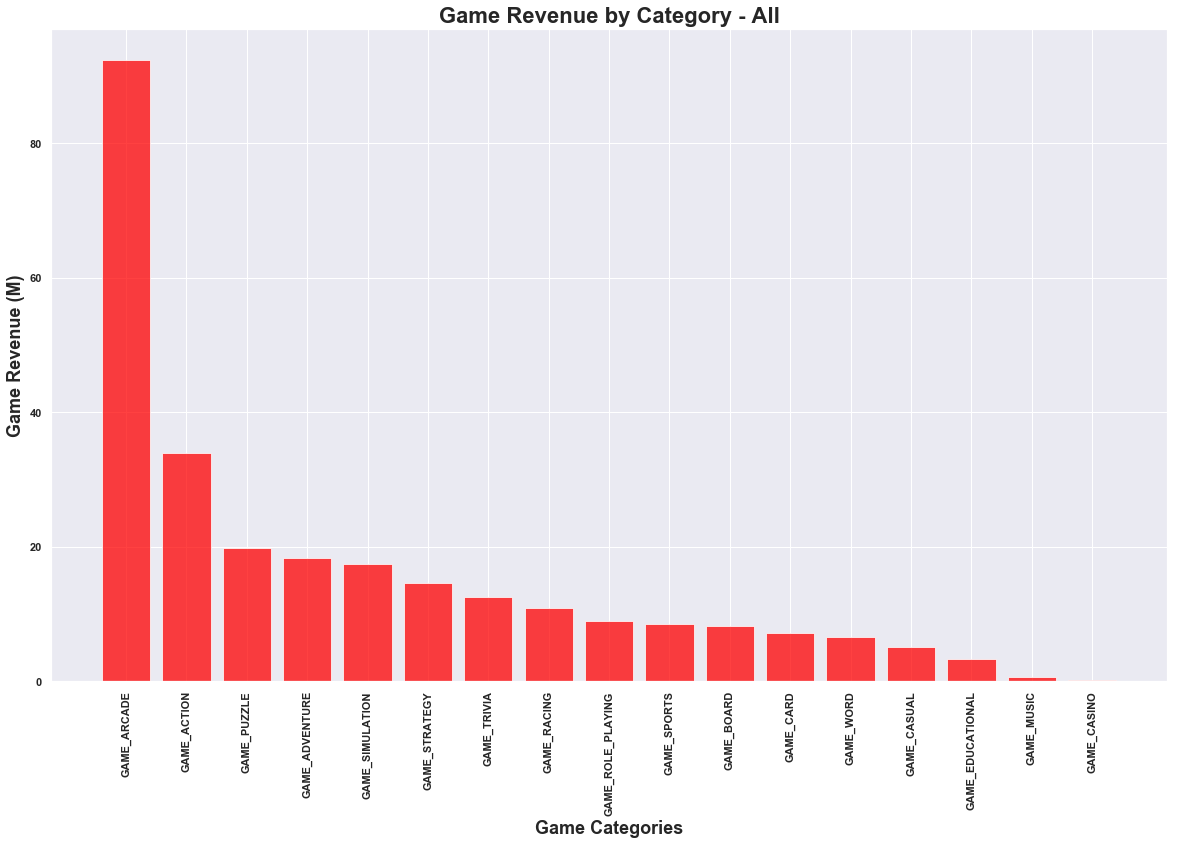

In [273]:
x_axis = np.arange(len(price_values))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,12))
plt.bar(x_axis, price_values["Revenue(M)"], color='#ff0101', alpha=0.75, align="center")
plt.xticks(tick_locations, price_values["Game Category"], rotation="vertical")
plt.title("Game Revenue by Category - All", weight="bold", size="22")
plt.xlabel('Game Categories', size="18")
plt.ylabel("Game Revenue (M)", size="18")
plt.savefig("Images/Game Revenue by Category - All.png", bbox_inches="tight")
plt.show()

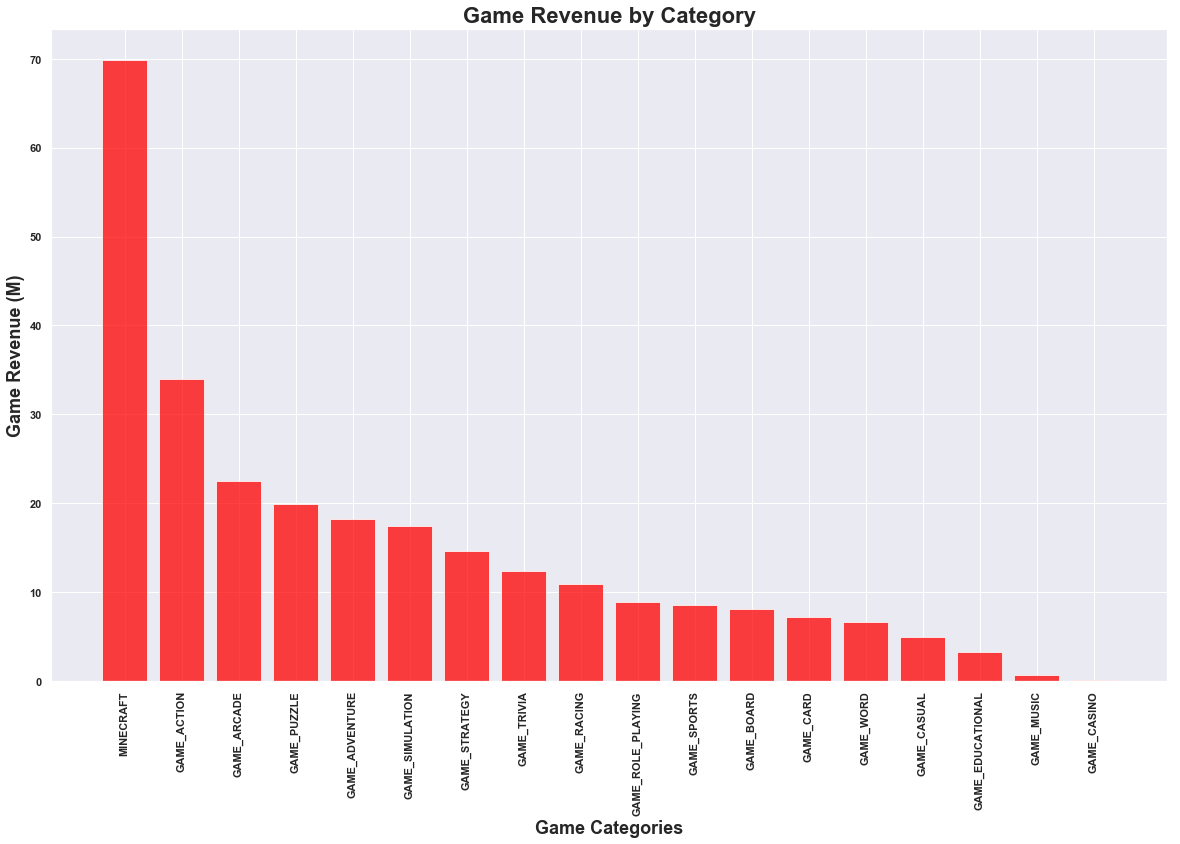

In [285]:
x_axis = np.arange(len(minecraft_values))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,12))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.bar(x_axis, minecraft_values["Revenue(M)"], color='#ff0101', alpha=0.75, align="center")
plt.xticks(tick_locations, minecraft_values["Game Category"], rotation="vertical")
plt.title("Game Revenue by Category", weight="bold", size="22")
plt.xlabel('Game Categories', size="18")
plt.ylabel("Game Revenue (M)", size="18")
plt.savefig("Images/Game Revenue by Category.png", bbox_inches="tight")
plt.show()

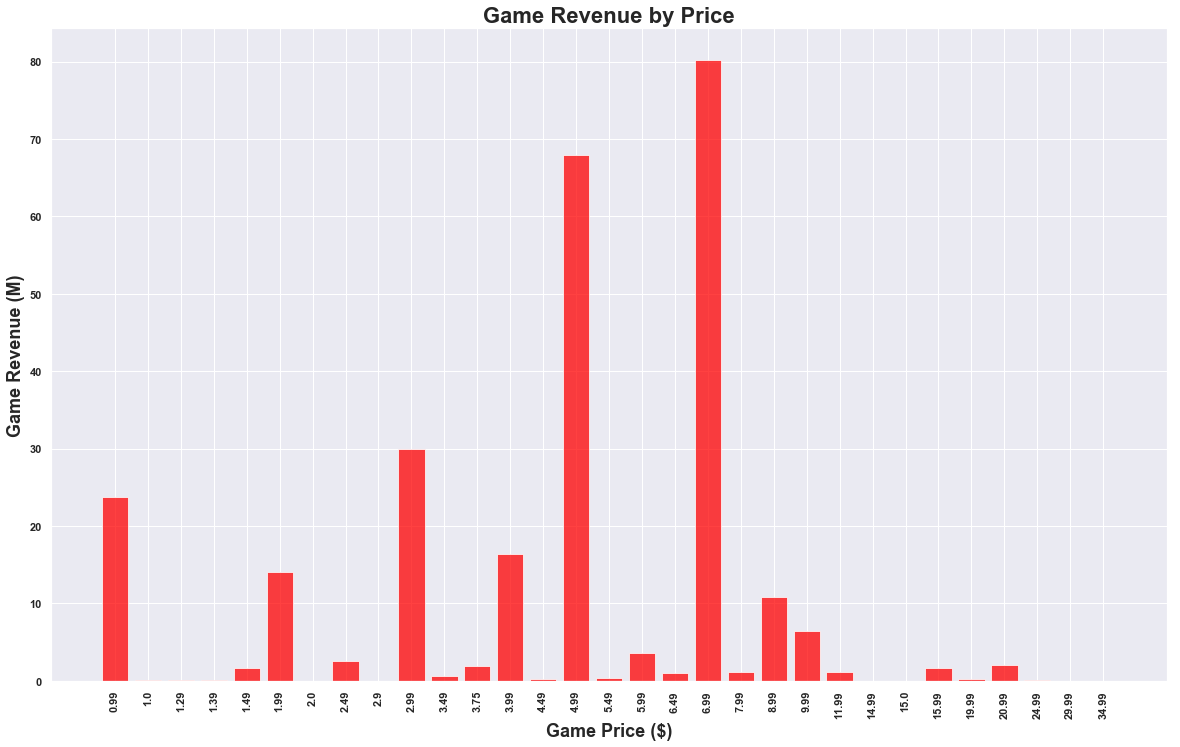

In [305]:
x_axis = np.arange(len(price_sums))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,12))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.bar(x_axis, price_sums["Total Revenue"], color='#ff0101', alpha=0.75, align="center")
plt.xticks(tick_locations, price_sums["Price"], rotation="vertical")
plt.title("Game Revenue by Price", weight="bold", size="22")
plt.xlabel('Game Price ($)', size="18")
plt.ylabel("Game Revenue (M)", size="18")
#plt.text(0.6, 0.6, "Note:\nMinecraft accounts for 69.9M of the 6.99 price point.", fontsize=14, transform=plt.gcf().transFigure)
plt.savefig("Images/Game Revenue by Price.png", bbox_inches="tight")
plt.show()

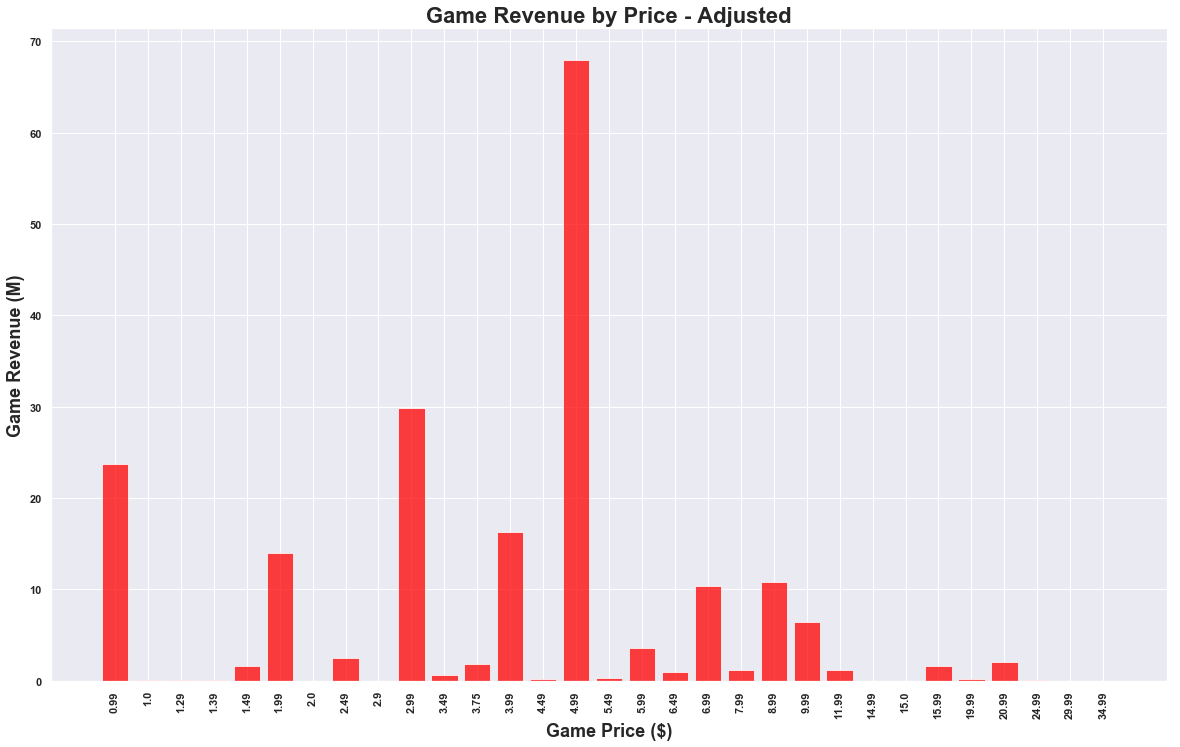

In [306]:
x_axis = np.arange(len(price_sums_no_mc))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(20,12))
plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.bar(x_axis, price_sums_no_mc["Total Revenue"], color='#ff0101', alpha=0.75, align="center")
plt.xticks(tick_locations, price_sums_no_mc["Price"], rotation="vertical")
plt.title("Game Revenue by Price - Adjusted", weight="bold", size="22")
plt.xlabel('Game Price ($)', size="18")
plt.ylabel("Game Revenue (M)", size="18")
#plt.text(0.6, 0.6, "Note:\nMinecraft accounts for 69.9M of the 6.99 price point.", fontsize=14, transform=plt.gcf().transFigure)
plt.savefig("Images/Game Revenue by Price - No MC.png", bbox_inches="tight")
plt.show()

In [87]:
# top grossing instance from df above
price_sums.loc['price_sums['Total Download Revenue ($)'].idxmax()]

Avg. Game Score                      4.5
Total Reviews                  2590624.0
Total Installs                10000000.0
Total Download Revenue ($)    69900000.0
Name: (GAME_ARCADE, 6.99), dtype: float64

In [102]:
# top 10 grossing instances with category and pricepoint
top_grossing = price_sums['Total Download Revenue ($)'].nlargest(10).to_frame()
top_grossing

,,Total Download Revenue ($)
Game Category,Price,
GAME_ARCADE,6.99,69900000.0
GAME_ADVENTURE,4.99,12275400.0
GAME_ACTION,0.99,12028500.0
GAME_SIMULATION,4.99,11377200.0
GAME_ARCADE,4.99,9980000.0
GAME_ACTION,6.99,9087000.0
GAME_TRIVIA,8.99,8990000.0
GAME_ACTION,4.99,6986000.0
GAME_STRATEGY,2.99,6578000.0


In [173]:
overall_top = games_df['Total Download Revenue ($)'].nlargest(25).to_frame()
games_df.loc[overall_top.index]

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL,Total Download Revenue ($)
50,Minecraft,GAME_ARCADE,4.5,2590624,6.99,10000000,Mojang,https://play.google.com/store/apps/details?id=...,69900000.0
3,Hitman Sniper,GAME_ACTION,4.6,590033,0.99,10000000,SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...,9900000.0
397,QuizClash™ PREMIUM,GAME_TRIVIA,4.2,90894,8.99,1000000,FEO,https://play.google.com/store/apps/details?id=...,8990000.0
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,386728,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.0
7,Grand Theft Auto III,GAME_ACTION,4.0,96594,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.0
25,Terraria.,GAME_ADVENTURE,4.3,231108,4.99,1000000,505 Games Srl,https://play.google.com/store/apps/details?id=...,4990000.0
52,Grand Theft Auto: Vice City,GAME_ARCADE,4.3,131945,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.0
66,Worms 3,GAME_ARCADE,4.2,67887,4.99,1000000,Team 17 Digital Limited,https://play.google.com/store/apps/details?id=...,4990000.0
251,Need for Speed Most Wanted,GAME_RACING,3.9,44733,4.99,1000000,ELECTRONIC ARTS,https://play.google.com/store/apps/details?id=...,4990000.0
305,Goat Simulator,GAME_SIMULATION,4.3,100947,4.99,1000000,Coffee Stain Publishing,https://play.google.com/store/apps/details?id=...,4990000.0


In [103]:
# Export the dataframes to a csv file for reference
games_df.to_csv('Master_Game_List.csv', encoding='utf-8')
price_sums.to_csv('Game_Pricing_Breakdown.csv', encoding='utf-8')

In [118]:
price_groups = games_df[["Price","Number of Installs"]].groupby(['Price'])
price_groups.sum()


,Number of Installs
Price,
0.99,24007635
1.00,100000
1.29,105000
1.39,100000
1.49,1121255
1.99,7049905
2.00,100
2.49,1011120
2.90,1000


In [164]:
games_df.head(60)

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL,Total Download Revenue ($)
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,386728,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.0
1,Five Nights at Freddy's,GAME_ACTION,4.6,103745,2.99,1000000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,2990000.0
2,Five Nights at Freddy's: SL,GAME_ACTION,4.5,17302,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,299000.0
3,Hitman Sniper,GAME_ACTION,4.6,590033,0.99,10000000,SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...,9900000.0
4,Assassin's Creed Identity,GAME_ACTION,3.8,49874,1.99,500000,Ubisoft Entertainment,https://play.google.com/store/apps/details?id=...,995000.0
5,Five Nights at Freddy's 4,GAME_ACTION,4.6,21560,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,299000.0
6,Call of Duty:Black Ops Zombies,GAME_ACTION,4.2,13974,6.99,100000,"Activision Publishing, Inc.",https://play.google.com/store/apps/details?id=...,699000.0
7,Grand Theft Auto III,GAME_ACTION,4.0,96594,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.0
8,Teen Titans GO Figure!,GAME_ACTION,4.5,4537,3.99,50000,Cartoon Network,https://play.google.com/store/apps/details?id=...,199500.0
9,Downwell,GAME_ACTION,4.7,4544,2.99,100000,DevolverDigital,https://play.google.com/store/apps/details?id=...,299000.0


In [290]:
#Create DF withOUT Minecraft
no_mc = games_df.copy()
#no_mine_df = no_mine_df

no_mc.drop(no_mc.index[50], inplace=True)
no_mc.head(60)

,Game Title,Game Category,Game Score,Number of Reviews,Price,Number of Installs,Developer,Play Store URL,Total Download Revenue ($)
0,Grand Theft Auto: San Andreas,GAME_ACTION,4.3,386728,6.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,6990000.0
1,Five Nights at Freddy's,GAME_ACTION,4.6,103745,2.99,1000000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,2990000.0
2,Five Nights at Freddy's: SL,GAME_ACTION,4.5,17302,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,299000.0
3,Hitman Sniper,GAME_ACTION,4.6,590033,0.99,10000000,SQUARE ENIX Ltd,https://play.google.com/store/apps/details?id=...,9900000.0
4,Assassin's Creed Identity,GAME_ACTION,3.8,49874,1.99,500000,Ubisoft Entertainment,https://play.google.com/store/apps/details?id=...,995000.0
5,Five Nights at Freddy's 4,GAME_ACTION,4.6,21560,2.99,100000,Scott Cawthon,https://play.google.com/store/apps/details?id=...,299000.0
6,Call of Duty:Black Ops Zombies,GAME_ACTION,4.2,13974,6.99,100000,"Activision Publishing, Inc.",https://play.google.com/store/apps/details?id=...,699000.0
7,Grand Theft Auto III,GAME_ACTION,4.0,96594,4.99,1000000,Rockstar Games,https://play.google.com/store/apps/details?id=...,4990000.0
8,Teen Titans GO Figure!,GAME_ACTION,4.5,4537,3.99,50000,Cartoon Network,https://play.google.com/store/apps/details?id=...,199500.0
9,Downwell,GAME_ACTION,4.7,4544,2.99,100000,DevolverDigital,https://play.google.com/store/apps/details?id=...,299000.0


In [296]:
action = no_mc.loc[no_mc["Game Category"] == "GAME_ACTION", :]
adventure = no_mc.loc[no_mc["Game Category"] == "GAME_ADVENTURE", :]
arcade = no_mc.loc[no_mc["Game Category"] == "GAME_ARCADE", :]
board = no_mc.loc[no_mc["Game Category"] == "GAME_BOARD", :]
card = no_mc.loc[no_mc["Game Category"] == "GAME_CARD", :]
casino = no_mc.loc[no_mc["Game Category"] == "GAME_CASINO", :]
casual = no_mc.loc[no_mc["Game Category"] == "GAME_CASUAL", :]
educational = no_mc.loc[no_mc["Game Category"] == "GAME_EDUCATIONAL", :]
music = no_mc.loc[no_mc["Game Category"] == "GAME_MUSIC", :]
puzzle = no_mc.loc[no_mc["Game Category"] == "GAME_PUZZLE", :]
racing = no_mc.loc[no_mc["Game Category"] == "GAME_RACING", :]
rpg = no_mc.loc[no_mc["Game Category"] == "GAME_ROLE_PLAYING", :]
simulation = no_mc.loc[no_mc["Game Category"] == "GAME_SIMULATION", :]
sports = no_mc.loc[no_mc["Game Category"] == "GAME_SPORTS", :]
strategy = no_mc.loc[no_mc["Game Category"] == "GAME_STRATEGY", :]
trivia = no_mc.loc[no_mc["Game Category"] == "GAME_TRIVIA", :]
word = no_mc.loc[no_mc["Game Category"] == "GAME_WORD", :]

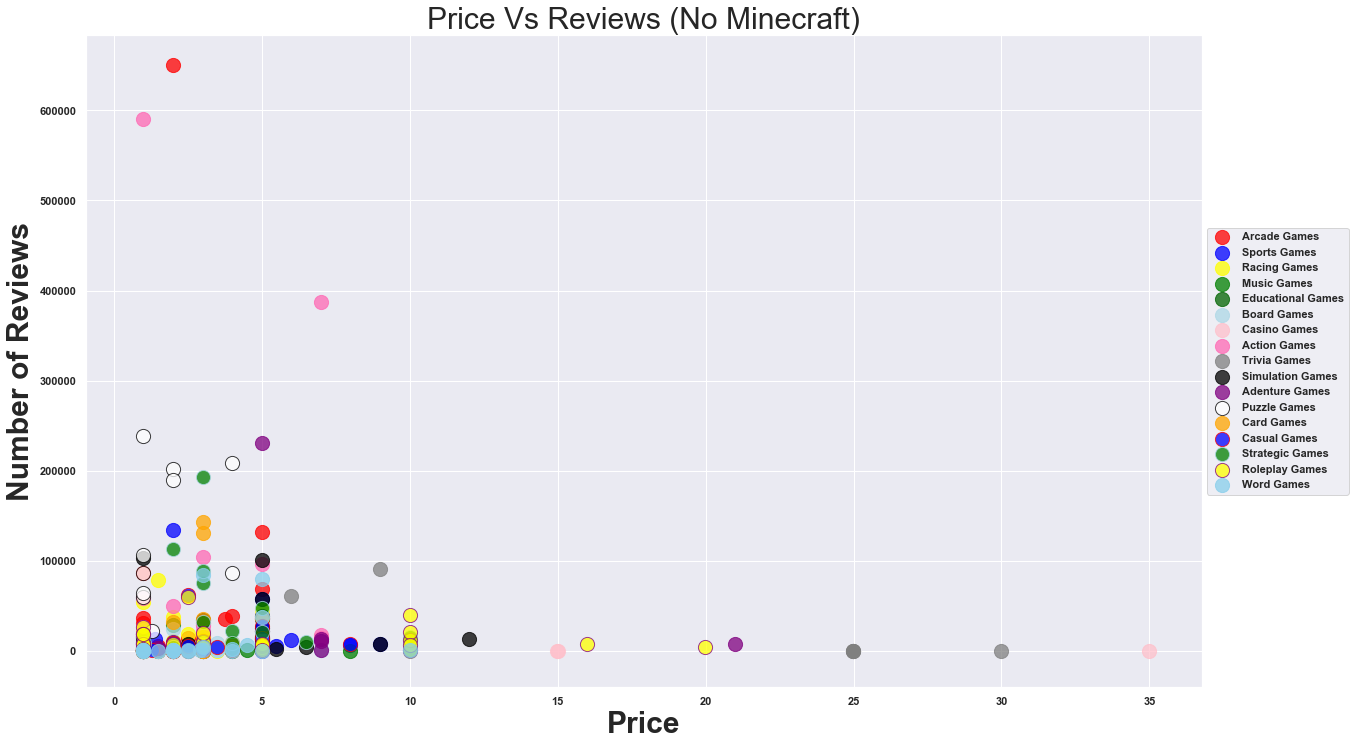

In [300]:
####Price Vs Reviews Scatter Plot (WithOUT Minecraft)
plt.figure(figsize=(20,12))
plt.rcParams['axes.facecolor'] = '#eaeaf2'
plt.grid(color='w')

game1 = plt.scatter(arcade["Price"], arcade["Number of Reviews"], s=200, marker="o", label="Arcade Games", color="red", alpha=0.75)
game2 = plt.scatter(sports["Price"], sports["Number of Reviews"], s=200, marker="o", label="Sports Games", color="blue", alpha=0.75)
game3 = plt.scatter(racing["Price"], racing["Number of Reviews"], s=200, marker="o", label="Racing Games", color="yellow", alpha=0.75)
game4 = plt.scatter(music["Price"], music["Number of Reviews"], s=200, marker="o",  label="Music Games", color="green", alpha=0.75)
game5 = plt.scatter(educational["Price"], educational["Number of Reviews"], s=200, marker="o", label="Educational Games", color="darkgreen", alpha=0.75)
game6 = plt.scatter(board["Price"], board["Number of Reviews"], s=200, marker="o", label="Board Games", color="lightblue", alpha=0.75)
game7 = plt.scatter(casino["Price"], casino["Number of Reviews"], s=200, marker="o", label="Casino Games", color="pink", alpha=0.75)
game8 = plt.scatter(action["Price"], action["Number of Reviews"], s=200, marker="o", label="Action Games", color="hotpink", alpha=0.75)
game9 = plt.scatter(trivia["Price"], trivia["Number of Reviews"], s=200, marker="o", label="Trivia Games", color="grey", alpha=0.75)
game10 = plt.scatter(simulation["Price"], simulation["Number of Reviews"], s=200, marker="o", label="Simulation Games", color="black", alpha=0.75)
game11 = plt.scatter(adventure["Price"], adventure["Number of Reviews"], s=200, marker="o", label="Adenture Games", color="purple", alpha=0.75)
game12 = plt.scatter(puzzle["Price"], puzzle["Number of Reviews"], s=200, marker="o", label="Puzzle Games", color="white", edgecolor="black",alpha=0.75)
game13 = plt.scatter(card["Price"], card["Number of Reviews"], s=200, marker="o", label="Card Games", color="orange", alpha=0.75)
game14 = plt.scatter(casual["Price"], casual["Number of Reviews"], s=200, marker="o", label="Casual Games", color="blue",edgecolor="red", alpha=0.75)
game15 = plt.scatter(strategy["Price"], strategy["Number of Reviews"], s=200, marker="o", label="Strategic Games", color="green", edgecolor="lightblue", alpha=0.75)
game16 = plt.scatter(rpg["Price"], rpg["Number of Reviews"], s=200, marker="o", label="Roleplay Games", color="yellow", edgecolor="purple", alpha=0.75)
game17 = plt.scatter(word["Price"], word["Number of Reviews"], s=200, marker="o", label="Word Games", color="skyblue", alpha=0.75)

#labeling the graph
plt.xlabel("Price", fontsize=30)
plt.ylabel("Number of Reviews", fontsize=30)
plt.title("Price Vs Reviews (No Minecraft)",  fontsize=30)
#plt.legend((arcade_p,sports_p,racing_p,music_p,educational_p,board_p,casino_p,action_p,trivia_p,simulation_p,
           #adventure_p,puzzle_p,card_p,casual_p,strategy_p,roleplay_p,word_p),
           #("Arcade","Sports","Racing","Music","Education","Board","Casino","Action","Trivia","Simulation",
           #"Adventure","Puzzle","Card","Casual","Strategic","Roleplay","Word"))
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.savefig("Images/PriceVsReviewsNM.png", bbox_inches="tight")